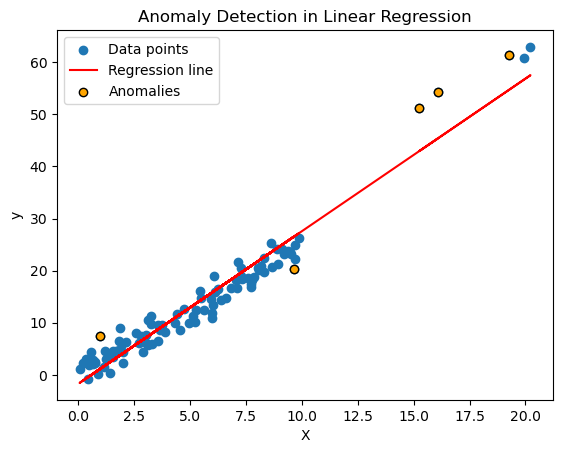

Indices of anomalies: [34 37 97 98 99]
Anomalous X values: [ 9.65632033  0.97672114 19.27541018 15.25419127 16.07891427]
Anomalous y values: [20.3032584   7.36828708 61.37082941 51.18885977 54.35165217]


In [2]:
#linear regression under supervised learning techniques
#Anomaly detection in linear regression can be approached by identifying data points that significantly deviate from the predicted regression line. 
#This can be done using statistical measures like residuals or by applying techniques such as the Z-score or Cook's distance.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Sample Data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2

# Introducing some anomalies
X[95:100] = X[95:100] + 15
y[95:100] = y[95:100] + 50

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Z-score for Anomaly Detection
z_scores = np.abs(stats.zscore(residuals))

# Set a threshold for anomalies
threshold = 2.0
anomalies = np.where(z_scores > threshold)

# Plotting
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.scatter(X[anomalies], y[anomalies], color='orange', label='Anomalies', edgecolor='black')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Anomaly Detection in Linear Regression')
plt.show()

# Print the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous X values:", X[anomalies])
print("Anomalous y values:", y[anomalies])

Indices of anomalies: [95 96 97 98 99]
Anomalous values: [88.63778893 91.02963995 91.88963891 91.86159465 94.32777858]


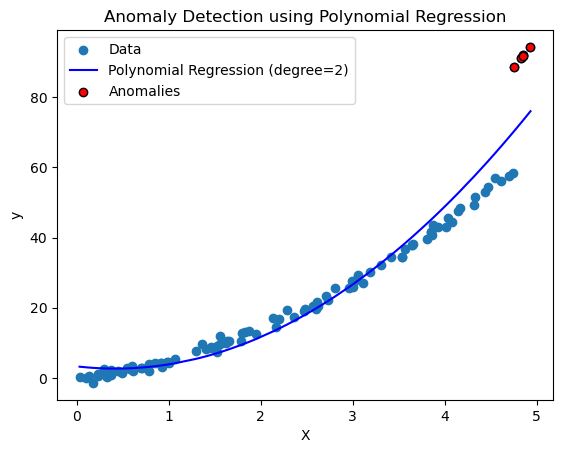

In [4]:
#POLYNOMIAL REGRESSION
#Anomaly detection in polynomial regression can be performed similarly to linear regression, with the main difference being that the model now fits
#a polynomial curve rather than a straight line. The anomalies are detected by identifying points with large residuals or using statistical measures 
#like Z-scores.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 2 * X**2 + 3 * X + np.random.randn(100, 1)

# Introduce anomalies
y[95:] = y[95:] + 30  # Adding anomalies in the last 5 points



# Transform the features into polynomial features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the output
y_pred = model.predict(X_poly)

# Calculate the residuals (errors)
residuals = np.abs(y - y_pred)

# Set a threshold for anomalies (e.g., 95th percentile of residuals)
threshold = np.percentile(residuals, 95)
anomalies = np.where(residuals > threshold)

# Output the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous values:", y[anomalies])

# Plot the original data and the polynomial regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='blue', label=f'Polynomial Regression (degree={degree})')

# Highlight the anomalies
plt.scatter(X[anomalies], y[anomalies], color='red', label='Anomalies', edgecolor='black')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Anomaly Detection using Polynomial Regression')
plt.legend()
plt.show()

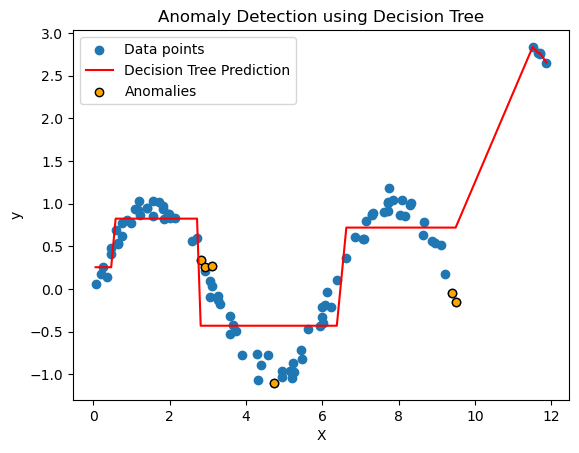

Indices of anomalies: [31 32 37 50 93 94]
Anomalous X values: [[2.8093451 ]
 [2.9122914 ]
 [3.11711076]
 [4.72214925]
 [9.39498942]
 [9.48885537]]
Anomalous y values: [ 0.34362627  0.25305216  0.27080366 -1.099006   -0.04558948 -0.15298501]


In [5]:
#2. DECISION TREE
#Decision trees are not typically used directly for anomaly detection, but they can be applied by analyzing the residuals of the model's
#predictions or by using Isolation Forests, which are a tree-based method specifically designed for anomaly detection.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Introduce anomalies
X[95:100] = X[95:100] + 2
y[95:100] = y[95:100] + 3

# Fit a Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Z-score for Anomaly Detection
z_scores = np.abs(stats.zscore(residuals))

# Set a threshold for anomalies
threshold = 2.0
anomalies = np.where(z_scores > threshold)

# Plotting
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Decision Tree Prediction')
plt.scatter(X[anomalies], y[anomalies], color='orange', label='Anomalies', edgecolor='black')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Anomaly Detection using Decision Tree')
plt.show()

# Print the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous X values:", X[anomalies])
print("Anomalous y values:", y[anomalies])



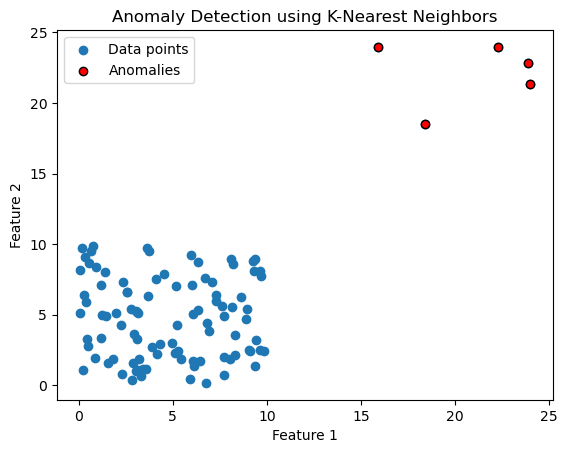

Indices of anomalies: [95 96 97 98 99]
Anomalous points: [[15.93102768 23.97215758]
 [24.00418057 21.33101457]
 [18.39029791 18.49209575]
 [22.25955679 23.9711026 ]
 [23.87086424 22.79875546]]


In [6]:
#3. K-Nearest Neighbour (KNN)
#Anomaly detection using the K-nearest neighbors (KNN) algorithm can be done by identifying points that have a large average distance to their nearest
#neighbors. These points are considered anomalies because they are far from other points in the dataset.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy import stats

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2) * 10

# Introduce anomalies
X[95:100] = X[95:100] + 15

# Fit the KNN model
k = 5
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find the distances to the k-th nearest neighbor
distances, _ = knn.kneighbors(X)
distances = distances[:, k-1]  # We take the distance to the k-th nearest neighbor

# Z-score for Anomaly Detection
z_scores = np.abs(stats.zscore(distances))

# Set a threshold for anomalies
threshold = 2.0
anomalies = np.where(z_scores > threshold)

# Plotting
plt.scatter(X[:, 0], X[:, 1], label='Data points')
plt.scatter(X[anomalies][:, 0], X[anomalies][:, 1], color='red', label='Anomalies', edgecolor='black')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using K-Nearest Neighbors')
plt.show()

# Print the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous points:", X[anomalies])





Accuracy: 0.030303030303030304
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.03      1.00      0.06         1

    accuracy                           0.03        33
   macro avg       0.02      0.50      0.03        33
weighted avg       0.00      0.03      0.00        33

Indices of detected anomalies: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Anomalous observations: [[ 1.86577451  0.47383292]
 [ 1.46564877 -0.2257763 ]
 [-0.46947439  0.54256004]
 [-0.24538812 -0.75373616]
 [ 0.09965137 -0.50347565]
 [-0.78325329 -0.32206152]
 [-0.47917424 -0.18565898]
 [ 0.09707755  0.96864499]
 [ 0.21409374 -1.24573878]
 [ 0.0675282  -1.42474819]
 [-1.1913035   0.65655361]
 [-0.97468167  0.7870846 ]
 [ 0.49671415 -0.1382643 ]
 [ 1.15859558 -0.82068232]
 [ 0.2088636  -1.95967012]
 [ 0.22745993  1.30714275]
 [ 0.06023021  2.46324211]
 [ 0.25988279  0.78182287]

C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


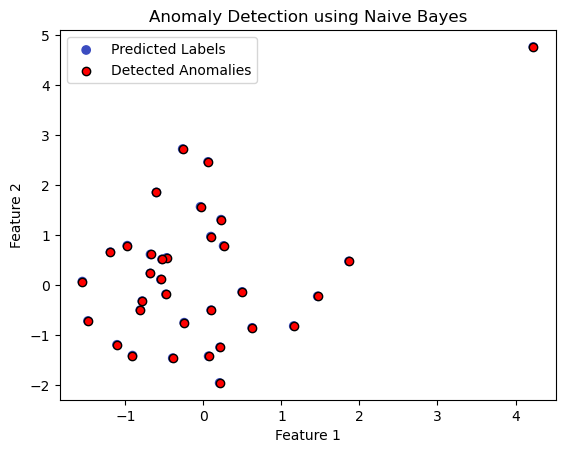

In [9]:
#4. Gaussian Naïve Bayesian
#Anomaly detection using a Naive Bayes classifier isn't a typical approach because Naive Bayes is mainly used for classification tasks.
#However, we can adapt it for anomaly detection by modeling the likelihood of the data and flagging points that have a low probability as anomalies.
#Example Code: Anomaly Detection Using Gaussian Naive Bayes
#This approach involves calculating the probability of each data point under the Naive Bayes model and treating low-probability points as anomalies.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data
np.random.seed(42)
X_normal = np.random.normal(loc=0, scale=1, size=(100, 2))  # Normal data
X_anomaly = np.random.normal(loc=5, scale=1, size=(10, 2))  # Anomalous data

# Create labels (0 for normal data, 1 for anomalies)
y_normal = np.zeros(X_normal.shape[0])
y_anomaly = np.ones(X_anomaly.shape[0])

# Combine the normal data and anomalies
X = np.vstack([X_normal, X_anomaly])
y = np.hstack([y_normal, y_anomaly])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gaussian Naive Bayes classifier on the normal data
model = GaussianNB()
model.fit(X_train[y_train == 0], y_train[y_train == 0])  # Train only on normal data

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)

# Set a threshold for anomaly detection based on probability
threshold = 0.5  # You can adjust this threshold
y_pred = (y_prob[:, 0] > threshold).astype(int)

# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Identify and print the anomalies
anomalies = np.where(y_pred == 1)
print("Indices of detected anomalies:", anomalies[0])
print("Anomalous observations:", X_test[anomalies])

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', label='Predicted Labels')
plt.scatter(X_test[anomalies][:, 0], X_test[anomalies][:, 1], color='red', label='Detected Anomalies', edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using Naive Bayes')
plt.legend()
plt.show()


